In [1]:
# Load math packages
print('Loading packages', flush=True)
from math import sin,cos,pi,sqrt
import numpy as np
from numpy.linalg import norm
from scipy import linalg as la
from scipy.cluster import hierarchy
from scipy.stats import wasserstein_distance

# Load visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as patches
from matplotlib.lines import Line2D  # Custom legends
mpl.rcParams['figure.dpi'] = 100     # high resolution output

# Load other packages
import pandas as pd
import requests
import json
from functools import reduce

print('All done', flush=True)

# Define rotation matrix
def rot(degrees):
    return np.array([[cos(degrees*pi/180), -sin(degrees*pi/180)],[sin(degrees*pi/180), cos(degrees*pi/180)]])

Loading packages
All done


# **LSM Partiju šķirotava**
https://www.lsm.lv/velesanas2022/partiju-skirotava/


In [ ]:
# Krāsas
party_colors = {
    'apvienotais-saraksts':'#444444', 'attistibai-par':'#f8e600', 'jauna-vienotiba':'#66c148',
    'katram-un-katrai':'#211b1d', 'konservativie':'#1e264d', 'latvija-pirma-vieta':'#9d2f3a',
    'latvijas-krievu-savieniba':'#e21b25', 'nacionala-apvieniba':'#f6c608', 'progresivie':'#e64533',
    'republika':'#1d4471', 'stabilitatei':'#ee7a02', 'zalo-un-zemnieku-savieniba':'#029638'
  }

# Īsie vārdi
party_short = {
    'apvienotais-saraksts':'AS', 'attistibai-par':'A/P', 'jauna-vienotiba':'JV',
    'katram-un-katrai':'KaKa', 'konservativie':'K', 'latvija-pirma-vieta':'LPV',
    'latvijas-krievu-savieniba':'LKS', 'nacionala-apvieniba':'NA', 'progresivie':'PRO',
    'republika':'R', 'stabilitatei':'S!', 'zalo-un-zemnieku-savieniba':'ZZS'
  }

# Jautājumi
questions = {
    0: 'Lai tuvākajos gados veicinātu uzņēmējdarbību un veidotu jaunas darba vietas, ir attaisnojama plašāka Latvijas mežu izciršana',
    1: 'Pašvaldības ikdienas darbā (piemēram, iedzīvotāju konsultatīvajās padomēs, sabiedriskajās apspriedēs, līdzdalības budžeta veidošanā) jāiesaista visi vietējie iedzīvotāji, ne tikai Latvijas pilsoņi',
#     1: 'Pašvaldības ikdienas darbā jāiesaista visi vietējie iedzīvotāji, ne tikai Latvijas pilsoņi',
    2: 'Jānosaka bargi sodi uzņēmumiem par Krievijas naftas sajaukšanu ar citas izcelsmes naftu, lai apietu pret Krieviju noteiktās sankcijas',
    3: 'Latvijai jāratificē Stambulas konvencija (par vardarbības pret sievietēm un vardarbības ģimenē novēršanu un apkarošanu)',
    4: 'Ja sabiedrības vairākumam nepatīk kāds mākslas pasākums (mākslas akcija), tas būtu jāaizliedz',
    5: 'Latvijai ir jānosoda nopietni cilvēktiesību un tiesiskuma pārkāpumi, kas notiek citās Eiropas Savienības valstīs',
    6: 'Latvijā jāievieš obligātais militārais (valsts aizsardzības) dienests',
    7: 'Latvijas Valsts prezidents būtu jāievēl tautai',
    8: 'Latvijā biežāk jārīko referendumi',
    9: 'Par agresīvu uzvedību ceļu satiksmē būtu jākonfiscē transportlīdzeklis',
    10: 'Ir jāievieš obligāts vidusskolas eksāmens dabaszinātnēs',
    11: 'Ja tas ļautu samazināt darbaspēka nodokļus (nodokļi, kas piemērojami darbinieku algām), tad būtu attaisnojami paaugstināt nodokļus, kas piemērojami nekustamajam īpašumam (zemei, ēkām)',
    12: 'Bioloģiskajai (organiskajai) lauksaimniecībai būtu jāsniedz lielāks atbalsts nekā konvencionālajai (parastajai) lauksaimniecībai',
    13: 'Latvijā nav nepieciešams palielināt NATO spēku klātbūtni',
    14: 'Latvijā nav nepieciešami papildu ierobežojumi alkohola tirdzniecībai un reklamēšanai',
    15: 'Latvijā vairs nav jābūt tā sauktajām krievu skolām, kur mācību process daļēji notiek krievu valodā',
    16: 'Heteroseksuālajiem pāriem jābūt plašākām tiesībām nekā viendzimuma pāriem',
    17: 'Latvijā jāatļauj eitanāzija kā brīvprātīga izvēle neārstējami slimiem pacientiem',
    18: 'Latvijai ir jāsamazina līdzšinējais valsts atbalsts Ukrainas kara bēgļiem',
    19: 'Latvijai pagaidām jāatliek to pasākumu īstenošana, kas ļautu cīnīties pret klimata pārmaiņām, ja atlikšana ļautu pazemināt enerģijas cenas'
}

# Load data
dict58 = requests.get('http://euclidean.space/atbildes-lsm.json').json()

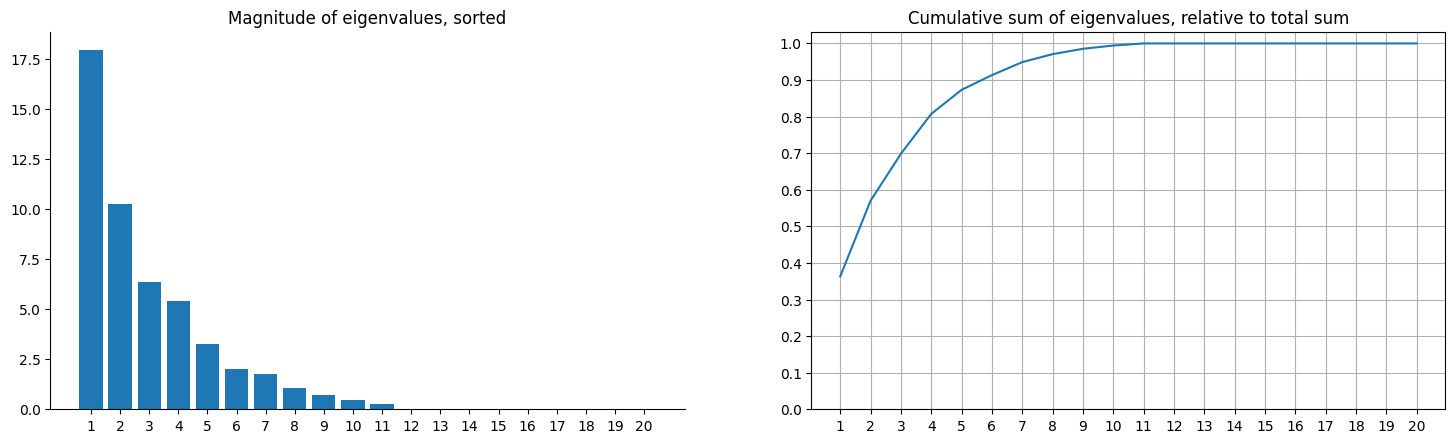

1 eigenvalues give 0.363 of total eigenvalue magnitude
2 eigenvalues give 0.57 of total eigenvalue magnitude
3 eigenvalues give 0.698 of total eigenvalue magnitude
4 eigenvalues give 0.807 of total eigenvalue magnitude
5 eigenvalues give 0.873 of total eigenvalue magnitude
6 eigenvalues give 0.913 of total eigenvalue magnitude


In [ ]:
# Jautajumi 20 no 58
qindex = [4, 6, 9, 10, 13, 14, 15, 17, 22, 25, 26, 28, 29, 30, 34, 36, 37, 39, 52, 56]

# Izveido pandas dataframe no tiem
data_dict = {p:[] for p in party_short.keys()}
for i in range(len(dict58['parties'])):
    current_party = dict58['answers'][i]['party']
    if current_party in party_short.keys():
        data_dict[current_party] = [dict58['answers'][i]['values'][str(j-1)] for j in qindex]
df = pd.DataFrame.from_dict(data_dict)
data = df.values
num_dimensions,num_samples = df.shape
party_list = list(df.columns)

# Mean-center the data
means = []
for row in data:
    means.append(np.mean(row))
data_meancentered = np.array([[element-means[i] for element in row] for i,row in enumerate(data)])

# Construct the sample covariance matrix
sample_cov = np.matmul(data_meancentered,np.transpose(data_meancentered))/(num_samples-1)

# Compute eigenvalues
U, s, VT = la.svd(sample_cov)
Uvecs = np.transpose(U)
Vvecs = VT
Svals = s

# Show eigenvalues
fig, axes = plt.subplots(1,2,figsize=(18,5))

ax = axes[0]
ax.bar(range(1,num_dimensions+1),Svals)
ax.set_xticks(range(1,num_dimensions+1))
ax.set_title('Magnitude of eigenvalues, sorted')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = axes[1]
ax.plot(range(1,num_dimensions+1),[sum(Svals[:k+1])/sum(Svals) for k in range(num_dimensions)])
ax.set_xticks(range(1,num_dimensions+1))
ax.set_yticks([k/10 for k in range(11)])
ax.set_title('Cumulative sum of eigenvalues, relative to total sum')
ax.grid('both')

plt.show()

for i in range(6):
    print(str(i+1)+' eigenvalues give '+str(round(sum(Svals[:i+1])/sum(Svals),3))+' of total eigenvalue magnitude')

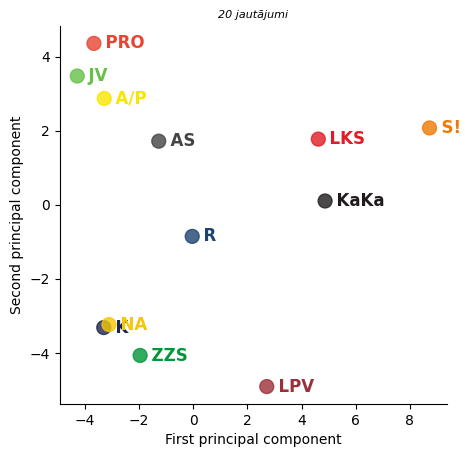

In [ ]:
# Project to two principal components
data_new = np.transpose(data_meancentered)
data_projected_dir1 = np.array([np.dot(sample,Uvecs[0])/np.dot(Uvecs[0],Uvecs[0]) for sample in data_new])
data_projected_dir2 = np.array([np.dot(sample,Uvecs[1])/np.dot(Uvecs[1],Uvecs[1]) for sample in data_new])

# Initiate figure
fig = plt.figure(figsize=(5,5), facecolor="w")
ax = plt.gca()
ax.set_title('20 jautājumi', fontstyle='italic', fontsize=8)

# Plot data
ax.scatter(data_projected_dir1, data_projected_dir2, s=100, c=[party_colors[p] for p in party_list if p!='suverena-vara'], alpha=.8)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
for i,p in enumerate([q for q in party_list if q!='suverena-vara']):
    ax.text(data_projected_dir1[i], data_projected_dir2[i], '  '+party_short[p], c=party_colors[p], va='center', ha='left', alpha=1, fontsize=12, fontweight='bold')

# Record relative data
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
q20pos = {p:() for p in party_list if p!='suverena-vara'}
for i,j,k in zip(range(12),data_projected_dir1, data_projected_dir2):
    q20pos[party_list[i]] = ((j-xmin)/(xmax-xmin), (k-ymin)/(ymax-ymin))

# Style plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('none')

# Show
plt.show()


In [ ]:
# Visi 58
party_short['suverena-vara'] = 'SV'
party_colors['suverena-vara'] = '#df73ff'

# Izveido pandas dataframe no tiem
data_dict = {p:[] for p in dict58['parties']}
for i in range(len(dict58['parties'])):
    current_party = dict58['answers'][i]['party']
    data_dict[current_party] = [dict58['answers'][i]['values'][str(j)] for j in range(58)]
df = pd.DataFrame.from_dict(data_dict)
data = df.values
num_dimensions,num_samples = df.shape
party_list = list(df.columns)

# Mean-center the data
means = []
for row in data:
    means.append(np.mean(row))
data_meancentered = np.array([[element-means[i] for element in row] for i,row in enumerate(data)])

# Construct the sample covariance matrix
sample_cov = np.matmul(data_meancentered,np.transpose(data_meancentered))/(num_samples-1)

# Compute eigenvalues
U, s, VT = la.svd(sample_cov)
Uvecs = np.transpose(U)
Vvecs = VT
Svals = s

# Print summary
for i in range(6):
    print(str(i+1)+' eigenvalues give '+str(round(sum(Svals[:i+1])/sum(Svals),3))+' of total eigenvalue magnitude')

1 eigenvalues give 0.353 of total eigenvalue magnitude
2 eigenvalues give 0.523 of total eigenvalue magnitude
3 eigenvalues give 0.646 of total eigenvalue magnitude
4 eigenvalues give 0.726 of total eigenvalue magnitude
5 eigenvalues give 0.792 of total eigenvalue magnitude
6 eigenvalues give 0.848 of total eigenvalue magnitude


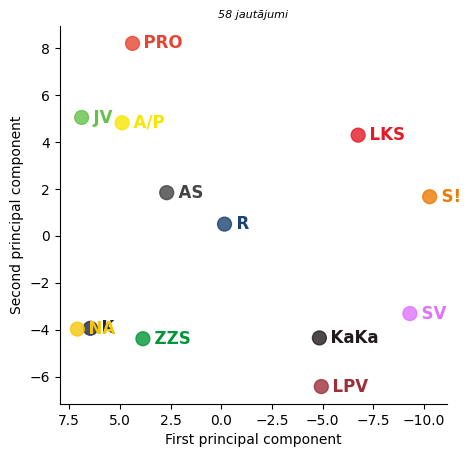

In [ ]:
# Project to two principal components
data_new = np.transpose(data_meancentered)
data_projected_dir1 = np.array([np.dot(sample,Uvecs[0])/np.dot(Uvecs[0],Uvecs[0]) for sample in data_new])
data_projected_dir2 = np.array([np.dot(sample,Uvecs[1])/np.dot(Uvecs[1],Uvecs[1]) for sample in data_new])

# Rotate to be closer to previous data
data_new_rotated = np.matmul(rot(15),np.vstack((data_projected_dir1,data_projected_dir2)))
data_projected_dir1 = data_new_rotated[0]
data_projected_dir2 = data_new_rotated[1]

# Initiate figure
fig = plt.figure(figsize=(5,5), facecolor="w")
ax = plt.gca()
ax.set_title('58 jautājumi', fontstyle='italic', fontsize=8)

# Draw data
ax.scatter(data_projected_dir1, data_projected_dir2, s=100, c=[party_colors[p] for p in party_list], alpha=.8)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
for i,p in enumerate(party_list):
    ax.text(data_projected_dir1[i], data_projected_dir2[i], '  '+party_short[p], c=party_colors[p], va='center', ha='left', alpha=1, fontsize=12, fontweight='bold')

# Record relative data
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
q58pos = {p:() for p in party_list}
for i,j,k in zip(range(13),data_projected_dir1, data_projected_dir2):
    q58pos[party_list[i]] = (1-(j-xmin)/(xmax-xmin), (k-ymin)/(ymax-ymin))

# Style data
# for side in ['top','bottom','left','right']:
#   ax.spines[side].set_visible(False)
# ax.set_facecolor('none')
# ax.set_xticks([])
# ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('none')
ax.set_xlim(ax.get_xlim()[::-1])

# Show
plt.show()

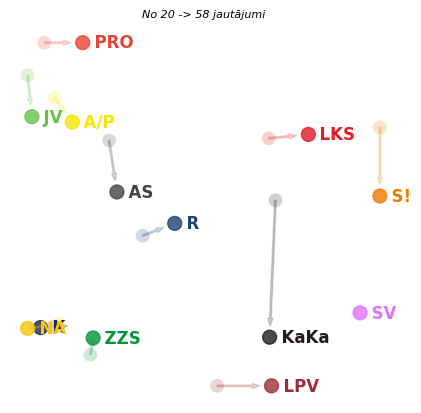

In [ ]:
# Relative change
# Initiate figure
fig = plt.figure(figsize=(5,5), facecolor="w")
ax = plt.gca()
ax.set_title('No 20 -> 58 jautājumi', fontstyle='italic', fontsize=8)

# Draw data
ax.scatter([q58pos[p][0] for p in party_list], [q58pos[p][1] for p in party_list], s=100, c=[party_colors[p] for p in party_list], alpha=.8)
for i,p in enumerate(party_list):
    ax.text(q58pos[p][0], q58pos[p][1], '  '+party_short[p], c=party_colors[p], va='center', ha='left', alpha=1, fontsize=12, fontweight='bold')

# Draw old data, lighter
ax.scatter([q20pos[p][0] for p in party_list if p!='suverena-vara'],
           [q20pos[p][1] for p in party_list if p!='suverena-vara'], s=100,
           c=[party_colors[p] for p in party_list if p!='suverena-vara'], alpha=.2, ec='none')

# Connect data
for p in party_list:
    if p not in ['suverena-vara','nacionala-apvieniba','zalo-un-zemnieku-savieniba']:
        shorten = .05
        x = q58pos[p][0]-q20pos[p][0]
        dy = q58pos[p][1]-q20pos[p][1]
        newdx = dx-shorten*dx/sqrt(dx**2+dy**2)
        newdy = dy-shorten*dy/sqrt(dx**2+dy**2)
        ax.arrow(q20pos[p][0], q20pos[p][1], newdx, newdy, color=party_colors[p], width=.0045, alpha=.2)
    elif p != 'suverena-vara':
        shorten = .02
        dx = q58pos[p][0]-q20pos[p][0]
        dy = q58pos[p][1]-q20pos[p][1]
        newdx = dx-shorten*dx/sqrt(dx**2+dy**2)
        newdy = dy-shorten*dy/sqrt(dx**2+dy**2)
        ax.arrow(q20pos[p][0], q20pos[p][1], newdx, newdy, color=party_colors[p], width=.0045, alpha=.2)

# Style data
for side in ['top','bottom','left','right']:
    ax.spines[side].set_visible(False)
ax.set_facecolor('none')
ax.set_xticks([])
ax.set_yticks([])

# Show
plt.show()

In [ ]:
# Atrodi izšķirtspējīgāko jautājumu katrā principal direction
topqlist = []
for i in range(58):
    vec = [abs(e) for e in Uvecs[i]]

    # Get next if already chosen
    indexmax = [i for _, i in sorted(zip(vec, range(58)))]
    indexmax = indexmax[::-1]
    current_spot = 0
    while indexmax[current_spot] in topqlist:
        current_spot += 1

    # Set max
    vec.sort()
    vec = vec[::-1]
    vecmax = vec[current_spot]
    qmax = indexmax[current_spot]

  # Print status
  # print('PC '+str(i)+' is most strongly correlated with question at index '+str(qmax)+': '+str(round(vecmax,3)))
    topqlist.append(qmax)

# Show final list
# topqlist.sort()
print(topqlist)

[46, 36, 38, 1, 33, 49, 16, 24, 7, 5, 18, 23, 30, 39, 0, 3, 6, 4, 52, 27, 9, 28, 47, 12, 2, 42, 21, 41, 54, 26, 29, 17, 32, 25, 44, 48, 50, 34, 53, 11, 35, 8, 19, 15, 51, 45, 13, 56, 57, 40, 43, 20, 22, 37, 31, 10, 55, 14]


In [ ]:
[q-1 for q in qindex]

[3, 5, 8, 9, 12, 13, 14, 16, 21, 24, 25, 27, 28, 29, 33, 35, 36, 38, 51, 55]

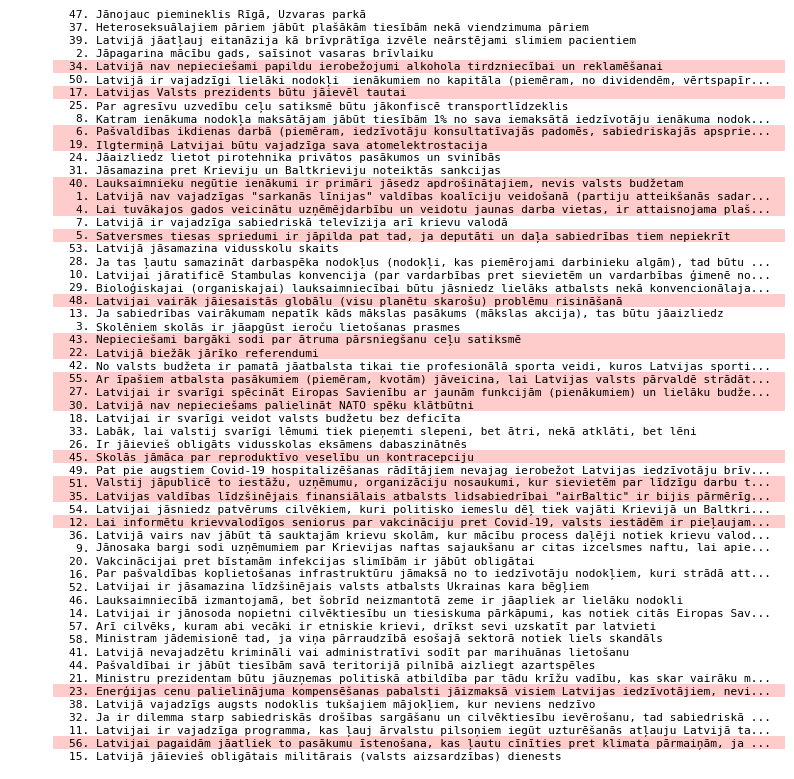

In [ ]:
# Parādi izvēlētos
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

# Uzraksti jautājumus
maxlen = 100
for i,q_index in enumerate(topqlist):

    # Highlight if selected
    if i in qindex:
        background = patches.Rectangle((-5, 58-i-.5), 90, 1, linewidth=0, edgecolor='r', facecolor='r', alpha=.2)
        ax.add_patch(background)

    # Write question
    current_q = dict58['questions'][str(q_index)]
    ax.text(0,58-i,str(q_index+1)+'. ', ha='right', va='center', fontfamily='monospace',fontsize=8)
    if len(current_q)>maxlen-3:
        ax.text(0,58-i,current_q[:maxlen-3]+'...', ha='left', va='center', fontfamily='monospace',fontsize=8)
    else:
        ax.text(0,58-i,current_q[:maxlen], ha='left', va='center', fontfamily='monospace',fontsize=8)

# Style
for side in ['top','bottom','left','right']:
    ax.spines[side].set_visible(False)
ax.set_facecolor('none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,58])
ax.set_xlim([-10,80])

# Show
plt.show()

In [ ]:
# Earth mover's distance
l = [dict58['answers'][i]['values']['0'] for i in range(12)]
l.sort()
l

[-2, -2, -2, -2, -2, -2, -1, -1, -1, 1, 1, 1]

In [ ]:
k = [dict58['answers'][i]['values']['1'] for i in range(12)]
k.sort()
k

[-2, -2, -2, -2, -2, -2, 0, 0, 0, 1, 1, 2]

In [ ]:
12*wasserstein_distance([dict58['answers'][i]['values']['0'] for i in range(12)], [dict58['answers'][i]['values']['1'] for i in range(12)])

4.0

In [ ]:
# Construct dustance matrix
dmat = np.zeros((58,58),dtype=float)
for i in range(58):
    for j in range(i+1,58):
        q1 = [dict58['answers'][p]['values'][str(i)] for p in range(12)]
        q2 = [dict58['answers'][p]['values'][str(j)] for p in range(12)]
        best_nofelex = [12*wasserstein_distance([q+shift for q in q1],q2) for shift in [-4,-3,-2,-1,0,1,2,3,4]]
        best_reflex = [12*wasserstein_distance([q+shift for q in q1],[-q for q in q2]) for shift in [-4,-3,-2,-1,0,1,2,3,4]]
        this_min = np.min(best_nofelex+best_reflex)
        if this_min in [0,21]:
            print((i,j))
        dmat[i][j] = this_min
        dmat[j][i] = this_min

(1, 50)
(4, 33)
(6, 47)
(20, 36)
(29, 35)
(41, 55)


In [ ]:
l = [dict58['answers'][p]['values']['35'] for p in range(12)]
l.sort()
l

[-2, -2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
l = [dict58['answers'][p]['values']['29'] for p in range(12)]
l.sort()
l

[-2, -2, -2, -2, -2, -2, -2, -2, -2, 0, 2, 2]

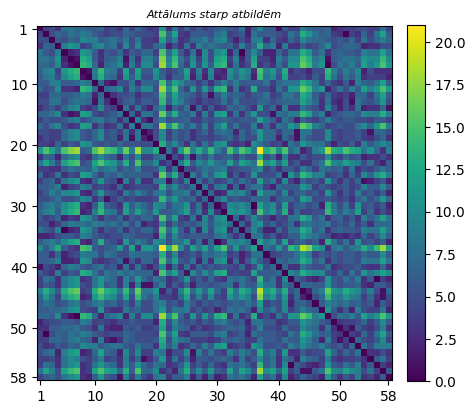

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
ax.set_title('Attālums starp atbildēm', fontstyle='italic', fontsize=8)
pos = plt.imshow(dmat)
fig.colorbar(pos, ax=plt.gca(), fraction=0.046, pad=0.04)

ax.set_xticks([0,9,19,29,39,49,57])
ax.set_xticklabels(['1','10','20','30','40','50','58'])

ax.set_yticks([0,9,19,29,39,49,57])
ax.set_yticklabels(['1','10','20','30','40','50','58'])

fig.patch.set_facecolor('w')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


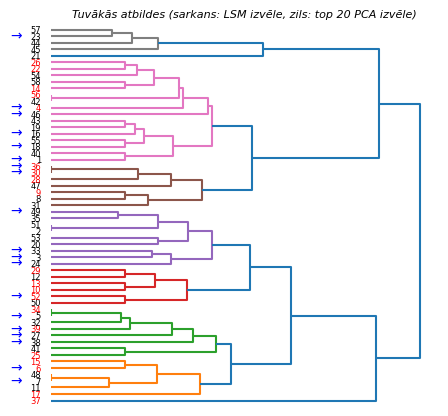

In [ ]:
# Dendrogram
fig = plt.figure(figsize=(5,5),facecolor='w')
dendrogram = hierarchy.linkage(dmat, 'average')
hierarchy.dendrogram(dendrogram, color_threshold=18, leaf_rotation=0, orientation='right', labels=[str(i+1) for i in range(58)])

ax = plt.gca()
ax.set_title('Tuvākās atbildes (sarkans: LSM izvēle, zils: top 20 PCA izvēle)', fontstyle='italic', fontsize=8)

ax.set_xticks([])
for dir in ['top', 'right', 'bottom', 'left']:
    ax.spines[dir].set_visible(False)

ylbls = ax.get_ymajorticklabels()
for i,lbl in enumerate(ylbls):
    current_q = int(lbl.get_text())

    # Color for LSM
    if current_q in qindex:
        lbl.set_color('r')
    else:
        lbl.set_color((0,0,0))

    # Arrow for PCA
    if current_q in topqlist[:20]:
        ax.text(-3,i*10+5,'→',ha='right', va='center', c='b')

plt.show()

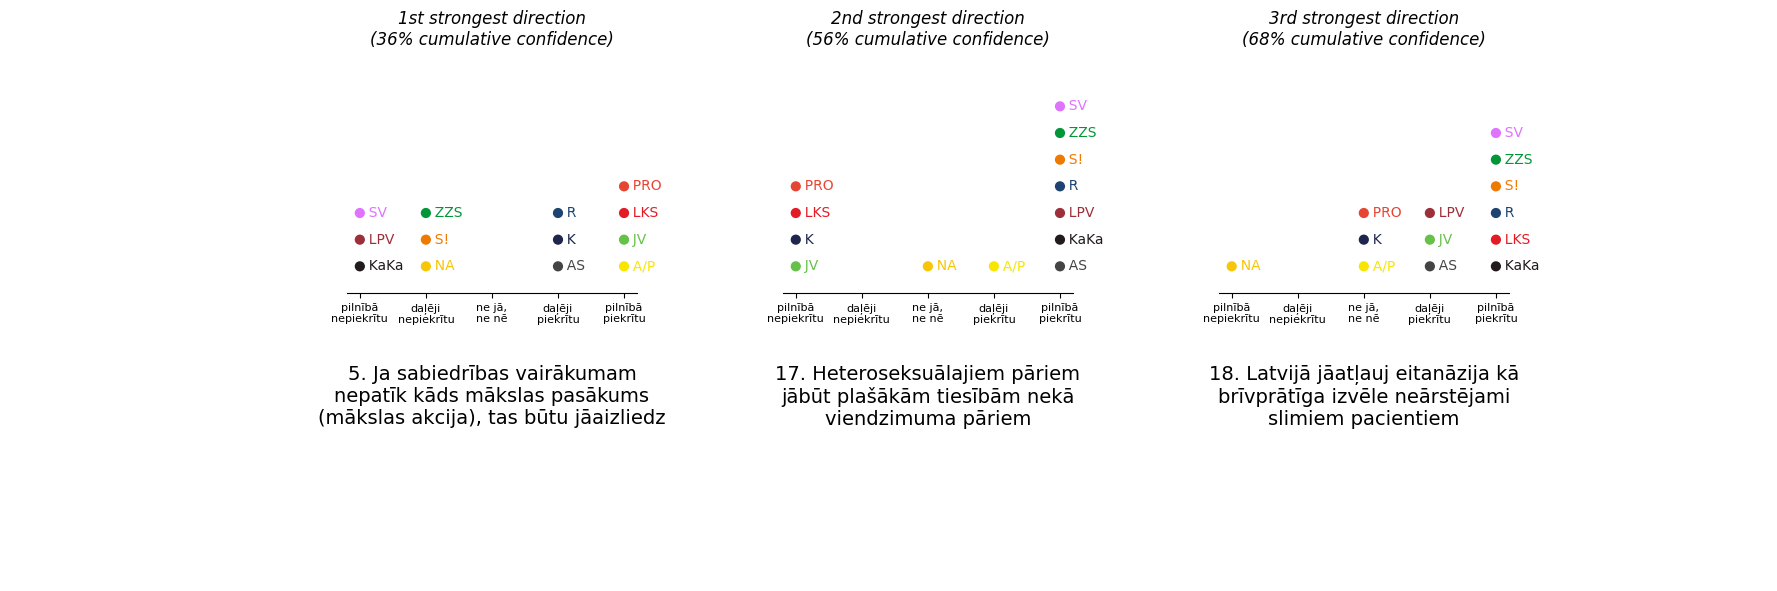

In [ ]:
# Show 1-3 principal components and questions
fig, axes = plt.subplots(2,3,figsize=(15,6),facecolor='w')
nums = ['1st', '2nd', '3rd']
percs = [36,56,68]

for i,q in enumerate([4,16,17]):
    ax = axes[0][i]
    ax.set_title(nums[i]+' strongest direction\n('+str(percs[i])+'% cumulative confidence)', fontstyle='italic')

    counters = [0,0,0,0,0]
    datax = []
    for j in data[q]:
        datax.append(counters[j+2])
        counters[j+2] += 1
    ax.scatter(data[q], datax, c=[party_colors[p] for p in party_list], s=40)
    for j,p in enumerate(party_list):
        ax.text(data[q][j], datax[j], '  '+party_short[p], c=party_colors[p], va='center')

    # ax.set_ylabel('PC'+str(i+1))
    ax.set_ylim([-1,8])
    ylims = ax.get_ylim()
    txt = ax.text(0,ylims[0]-.3*(ylims[1]-ylims[0]), str(q+1)+'. '+questions[q], ha='center', va='top', wrap=True, fontsize=14, bbox=dict(boxstyle='square', fc='none', ec='none'))
    txt._get_wrap_line_width = lambda : 350

for ax in axes[0]:
    for dir in ['top', 'right', 'left']:
        ax.spines[dir].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([-2,-1,0,1,2])
    ax.set_xticklabels(['pilnībā\nnepiekrītu', 'daļēji\nnepiekrītu', 'ne jā,\nne nē', 'daļēji\npiekrītu', 'pilnībā\npiekrītu'], fontsize=8)

for ax in axes[1]:
    for dir in ['top', 'right', 'bottom', 'left']:
        ax.spines[dir].set_visible(False)
    ax.set_facecolor('none')
    ax.set_yticks([])
    ax.set_xticks([])

plt.subplots_adjust(bottom=0, wspace=.5)
plt.show()

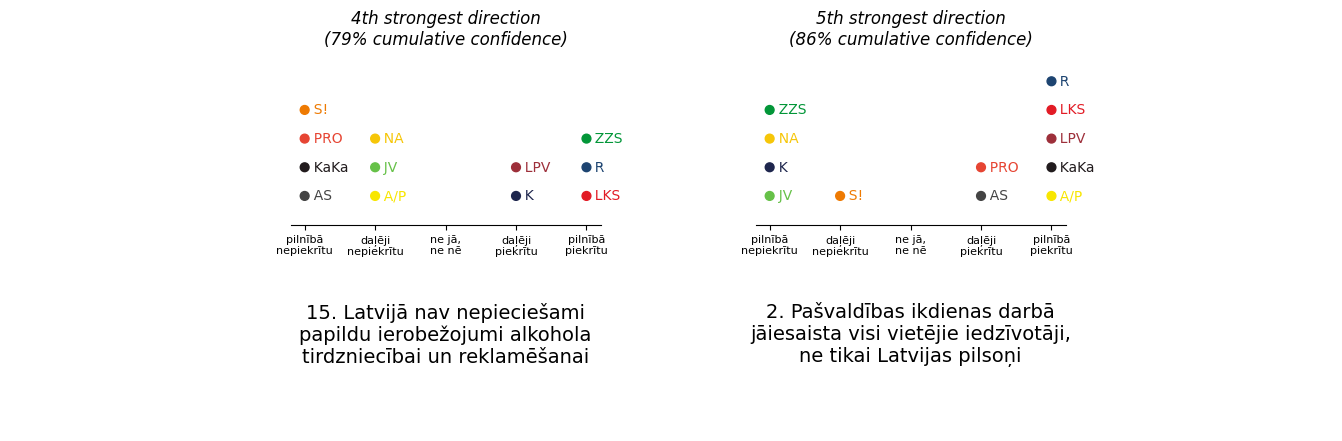

In [ ]:
# Show 4-5 principal components and questions
fig, axes = plt.subplots(2,2,figsize=(10,4.3), facecolor='w')
nums = ['4th', '5th']
percs = [79,86]

for i,q in enumerate([14,1]):
    ax = axes[0][i]
    ax.set_title(nums[i]+' strongest direction\n('+str(percs[i])+'% cumulative confidence)', fontstyle='italic')

    counters = [0,0,0,0,0]
    datax = []
    for j in data[q]:
        datax.append(counters[j+2])
        counters[j+2] += 1
    ax.scatter(data[q], datax, c=[party_colors[p] for p in party_list], s=40)
    for j,p in enumerate(party_list):
        ax.text(data[q][j], datax[j], '  '+party_short[p], c=party_colors[p], va='center')

    # ax.set_ylabel('PC'+str(i+1))
    ax.set_ylim([-1,5])
    ylims = ax.get_ylim()
    txt = ax.text(0,(-1)-.3*(8-(-1)), str(q+1)+'. '+questions[q], ha='center', va='top', wrap=True, fontsize=14, bbox=dict(boxstyle='square', fc='none', ec='none'))
    txt._get_wrap_line_width = lambda : 350

for ax in axes[0]:
    for dir in ['top', 'right', 'left']:
        ax.spines[dir].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([-2,-1,0,1,2])
    ax.set_xticklabels(['pilnībā\nnepiekrītu', 'daļēji\nnepiekrītu', 'ne jā,\nne nē', 'daļēji\npiekrītu', 'pilnībā\npiekrītu'], fontsize=8)

for ax in axes[1]:
    for dir in ['top', 'right', 'bottom', 'left']:
        ax.spines[dir].set_visible(False)
    ax.set_facecolor('none')
    ax.set_yticks([])
    ax.set_xticks([])

plt.subplots_adjust(bottom=0, wspace=.5)
plt.show()

In [ ]:
data_new = np.transpose(data_meancentered)
for i in range(6):
    print([abs(round(k,3)) for k in Uvecs[i]])

[0.045, 0.134, 0.263, 0.008, 0.339, 0.265, 0.285, 0.254, 0.245, 0.195, 0.172, 0.208, 0.309, 0.304, 0.005, 0.264, 0.059, 0.113, 0.33, 0.162]
[0.289, 0.13, 0.147, 0.341, 0.017, 0.18, 0.137, 0.256, 0.029, 0.026, 0.072, 0.312, 0.016, 0.176, 0.341, 0.109, 0.552, 0.144, 0.148, 0.184]
[0.107, 0.369, 0.09, 0.434, 0.118, 0.084, 0.282, 0.285, 0.064, 0.175, 0.007, 0.046, 0.159, 0.067, 0.203, 0.164, 0.1, 0.547, 0.135, 0.11]
[0.101, 0.158, 0.07, 0.112, 0.168, 0.021, 0.326, 0.361, 0.125, 0.433, 0.3, 0.061, 0.047, 0.212, 0.474, 0.304, 0.023, 0.142, 0.027, 0.009]
[0.126, 0.693, 0.129, 0.196, 0.024, 0.179, 0.088, 0.374, 0.359, 0.04, 0.18, 0.073, 0.014, 0.003, 0.171, 0.169, 0.069, 0.19, 0.042, 0.01]
[0.29, 0.279, 0.126, 0.014, 0.213, 0.134, 0.308, 0.222, 0.334, 0.131, 0.121, 0.299, 0.339, 0.216, 0.017, 0.144, 0.224, 0.012, 0.315, 0.222]


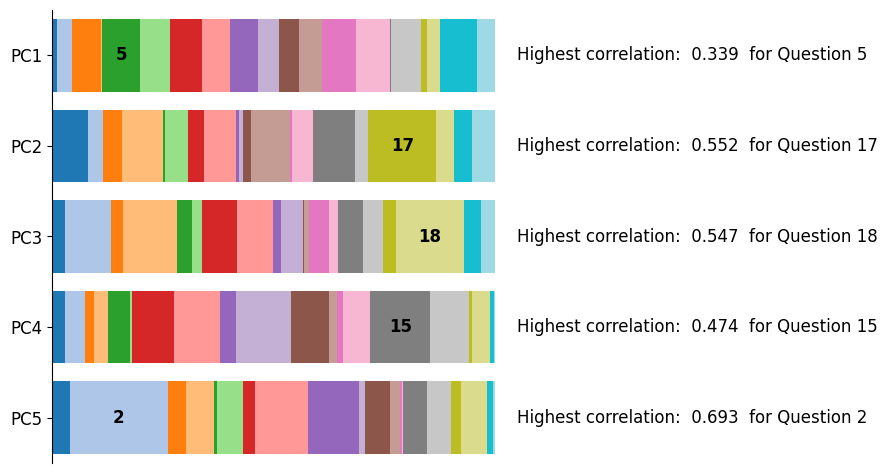

In [ ]:
# Stacked bar chart for importance of questions
fig = plt.figure(figsize=(6,6), facecolor='w')
ax = plt.gca()
qnum = 5
cmap = 'tab20'

ax.set_xticks([])
ax.set_yticks([4,3,2,1,0])
ax.set_yticklabels(['PC5', 'PC4', 'PC3', 'PC2', 'PC1'], fontsize=12)
ax.set_ylim([4.5,-.5])
for dir in ['top', 'bottom', 'right']:
    ax.spines[dir].set_visible(False)

Uvecs_sum = [sum(abs(u)) for u in Uvecs]
sumsofar = [0]*qnum
for q in range(20):
    ax.barh(range(qnum),[abs(Uvecs[i][q])/Uvecs_sum[i] for i in range(qnum)], left=sumsofar, color=plt.get_cmap(cmap)(q/20))
    sumsofar = [sumsofar[i]+abs(Uvecs[i][q])/Uvecs_sum[i] for i in range(qnum)]

for i in range(5):
    vec = [abs(e) for e in Uvecs[i]]
    vecmax = max(vec)
    vecmaxind = vec.index(vecmax)
    plt.text(1.05,i,'Highest correlation:  '+str(round(vecmax,3))+'  for Question '+str(vecmaxind+1), ha='left', va='center', fontsize=12)
    plt.text((sum(abs(Uvecs[i][:vecmaxind]))+sum(abs(Uvecs[i][:vecmaxind+1])))/(2*Uvecs_sum[i]),i,str(vecmaxind+1), ha='center', va='center', fontweight='bold', fontsize=12)

plt.show()

In [ ]:
[round(abs(Uvecs[0][q])/Uvecs_sum[0],3) for q in range(20)]


[0.011,
 0.034,
 0.066,
 0.002,
 0.086,
 0.067,
 0.072,
 0.064,
 0.062,
 0.049,
 0.043,
 0.052,
 0.078,
 0.077,
 0.001,
 0.067,
 0.015,
 0.028,
 0.083,
 0.041]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


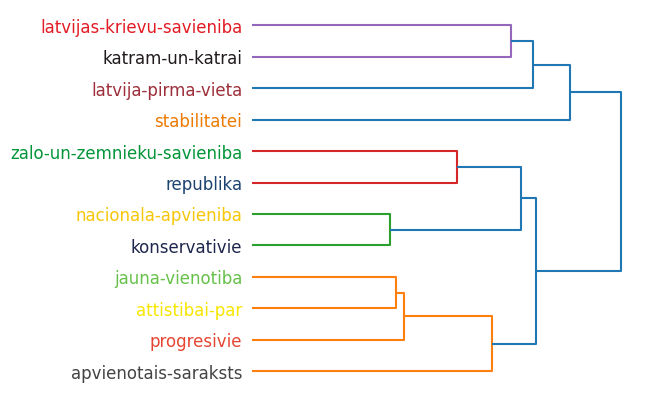

In [ ]:
# Dendrogram
data_transp = np.transpose(data)
D = np.zeros((num_samples,num_samples),dtype=float)
for i,p in enumerate(data_transp):
    for j,q in enumerate(data_transp):
        D[i][j] = norm(p-q)

fig = plt.figure(figsize=(5,5),facecolor='w')
dendrogram = hierarchy.linkage(D, 'average')
hierarchy.dendrogram(dendrogram, color_threshold=14, leaf_rotation=0, orientation='right', labels=party_list)

ax = plt.gca()
ax.set_xticks([])
for dir in ['top', 'right', 'bottom', 'left']:
    ax.spines[dir].set_visible(False)

ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    lbl.set_color(party_colors[lbl.get_text()])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


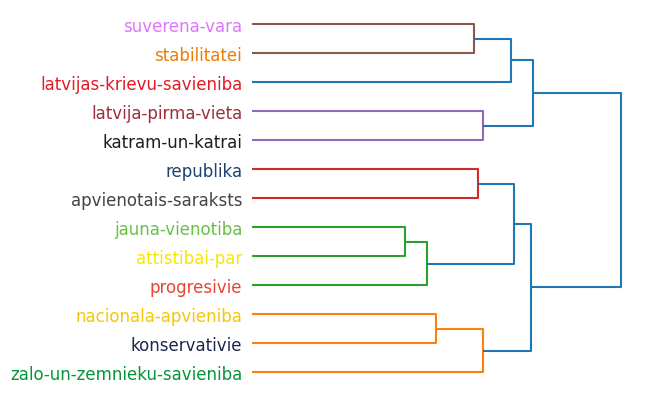

In [ ]:
# 58 Q dendrogram
data_transp = np.transpose(data)
D = np.zeros((num_samples,num_samples),dtype=float)
for i,p in enumerate(data_transp):
    for j,q in enumerate(data_transp):
        D[i][j] = norm(p-q)

fig = plt.figure(figsize=(5,5),facecolor='w')
dendrogram = hierarchy.linkage(D, 'average')
hierarchy.dendrogram(dendrogram, color_threshold=20, leaf_rotation=0, orientation='right', labels=party_list)

ax = plt.gca()
ax.set_xticks([])
for dir in ['top', 'right', 'bottom', 'left']:
    ax.spines[dir].set_visible(False)

ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    lbl.set_color(party_colors[lbl.get_text()])

plt.show()

# **IR Politiskais tinderis**
https://tinderis.lv/

In [ ]:
# Jautajumi un atbildes
raw_dict = requests.get('http://euclidean.space/atbildes-ir.json').json()

# Krāsas
party_colors_ir = {
    'Apvienotais saraksts':'#D719F7', 'Jaunā Vienotība':'#19C0F7', 'Nacionālā apvienība':'#AB0933', 'Attīstībai/Par!':'#f8e600',
    'Progresīvie':'#e64533', 'Zaļo un Zemnieku savienība':'#029638', 'Konservatīvie':'#1e264d'
  }

# Īsie vārdi
party_short_ir = {'Apvienotais saraksts':'AS', 'Jaunā Vienotība':'JV', 'Nacionālā apvienība':'NA', 'Attīstībai/Par!':'A/P', 'Progresīvie':'PRO', 'Zaļo un Zemnieku savienība':'ZZS', 'Konservatīvie':'K'}

# Partijas piederība un dataframe
member_of = {}
data_dict = {}
for i in range(len(raw_dict['answers'])):
    current_party = raw_dict['answers'][i]['party']
    for member in raw_dict['answers'][i]['members'].keys():
        member_of[member] = current_party
        data_dict[member] = [raw_dict['answers'][i]['members'][member][str(j)] for j in range(18)]

# Dataframe
df = pd.DataFrame.from_dict(data_dict)

In [ ]:
# Get parameters
data = df.values
num_dimensions,num_samples = df.shape
member_list = list(df.columns)

# Mean-center the data
means = []
for row in data:
    means.append(np.mean(row))
data_meancentered = np.array([[element-means[i] for element in row] for i,row in enumerate(data)])

# Construct the sample covariance matrix
sample_cov = np.matmul(data_meancentered,np.transpose(data_meancentered))/(num_samples-1)

# Compute eigenvalues
U, s, VT = la.svd(sample_cov)
Uvecs = np.transpose(U)
Vvecs = VT
Svals = s

# Project to two principal components
data_new = np.transpose(data_meancentered)
data_projected_dir1 = np.array([np.dot(sample,Uvecs[0])/np.dot(Uvecs[0],Uvecs[0]) for sample in data_new])
data_projected_dir2 = np.array([np.dot(sample,Uvecs[1])/np.dot(Uvecs[1],Uvecs[1]) for sample in data_new])

# Print summary
for i in range(6):
    print(str(i+1)+' eigenvalues give '+str(round(sum(Svals[:i+1])/sum(Svals),3))+' of total eigenvalue magnitude')

1 eigenvalues give 0.343 of total eigenvalue magnitude
2 eigenvalues give 0.538 of total eigenvalue magnitude
3 eigenvalues give 0.656 of total eigenvalue magnitude
4 eigenvalues give 0.723 of total eigenvalue magnitude
5 eigenvalues give 0.783 of total eigenvalue magnitude
6 eigenvalues give 0.832 of total eigenvalue magnitude


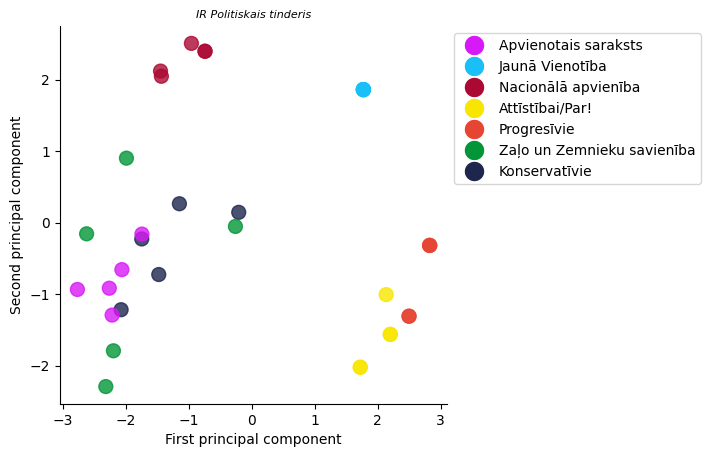

In [ ]:
# Initiate figure
fig = plt.figure(figsize=(5,5), facecolor="w")
ax = plt.gca()
ax.set_title('IR Politiskais tinderis', fontstyle='italic', fontsize=8)

# Draw data
ax.scatter(data_projected_dir1, data_projected_dir2, s=100, c=[party_colors_ir[member_of[m]] for m in member_list], alpha=.8)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
#for i,p in enumerate(party_list):
#  ax.text(data_projected_dir1[i], data_projected_dir2[i], '  '+party_short[p], c=party_colors[p], va='center', ha='left', alpha=1, fontsize=12, fontweight='bold')

# Style data
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('none')
# ax.set_xlim(ax.get_xlim()[::-1])

# Custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=p, markerfacecolor=party_colors_ir[p], markersize=15) for p in party_colors_ir.keys()]
ax.legend(handles=legend_elements, loc='upper left',  bbox_to_anchor=(1, 1))

# Show
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


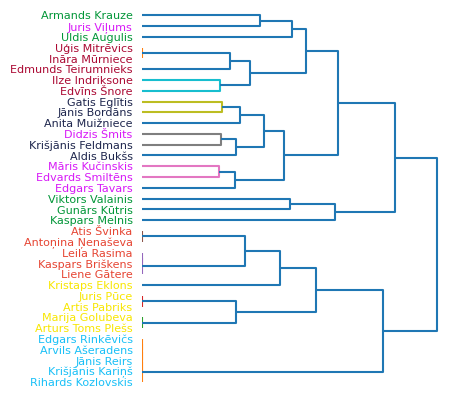

In [ ]:
# Lielākās mīlestības

# Izmēri attālumu
data_transp = np.transpose(data)
D = np.zeros((num_samples,num_samples),dtype=float)
for i,p in enumerate(data_transp):
    for j,q in enumerate(data_transp):
        D[i][j] = norm(p-q)

# Dabūn vārdus
member_names = reduce(lambda x,y: x+y, [list(raw_dict['answers'][i]['members'].keys()) for i in range(7)])

# Initiate figure
fig = plt.figure(figsize=(4,5),facecolor='w')
dendrogram = hierarchy.linkage(D, 'average')
hierarchy.dendrogram(dendrogram, color_threshold=4, leaf_rotation=0, orientation='right', labels=member_names)

ax = plt.gca()
ax.set_xticks([])
for dir in ['top', 'right', 'bottom', 'left']:
    ax.spines[dir].set_visible(False)

ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    current_name = lbl.get_text()
    current_party = member_of[current_name]
    lbl.set_color(party_colors_ir[current_party])

# Parādi
plt.show()

In [ ]:
# Next tweet thread
# 1: skirotavu open data + update: lsm un ir jsons
# 2: gif par to, ka LSM mainas ar 58 jautājumiem no 20
# 3: secinajums par to, kuri / cik jautajumi ir visfektivakie noteiceji. Vai tiešām bija pirmie 20.
# 4: PCA ar Ir
# (5): Ripser / persistence diagram ar ir, focus on 1-dim homology
# 5: Overlay lsm + Ir


# By graphics
# 1: LSM skirotava, old to new
# 1b. (check) Pareizais secinājums: Visos 58 jautājumos ir tādi, kas ātrāk atrod, kurai starp JV/AP/PRO vēlētājs līdzīgāks (noturot labu izšķirtspēju starp pārējām partijām arī)
#     (x) Nepareizais secinajums: Ar papildus jautajumiem redzam, ka AP/JV/Pro tomēr ir atšķirīgi.
#     (arrow) Nepareizs, jo: Projekcijas samazina attālumu starp *visām* partijām un tuvāko plakni. Secinājums varētu but patiess, bet šie dati to nepierāda
# 2: Vertejums par labakiem 20 jautajumiem

# Pedejais: Ieprieksejais pavediens te